# Multiclass Classification Practice

In [171]:
import torch
import numpy as np
import scipy
from sklearn import svm
import torch.nn as nn
import matplotlib.pyplot as plt
import helper_functions as hf
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
class Multiclass(nn.Module):
    def __init__(self, input, output, HIDDEN_UNITS=100):
        super().__init__()

        self.sequence = nn.Sequential(
            nn.Linear(in_features=input, out_features=HIDDEN_UNITS),
            nn.ReLU(),
            nn.Linear(in_features=HIDDEN_UNITS, out_features=HIDDEN_UNITS),
            nn.ReLU(),
            nn.Linear(in_features=HIDDEN_UNITS, out_features=HIDDEN_UNITS),
            nn.ReLU(),
            nn.Linear(in_features=HIDDEN_UNITS, out_features=HIDDEN_UNITS),
            nn.ReLU(),
            nn.Linear(in_features=HIDDEN_UNITS, out_features=output),
        )

    def forward(self, x):
        return self.sequence(x)
    
def train_model(model: nn.Module, data: torch.Tensor, labels: torch.Tensor, loops: int, lr=0.01):
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    model.train()

    for epoch in range(loops):
        optimizer.zero_grad()
        logits = model(data) 
        y_pred = torch.softmax(logits, dim=1).argmax(dim=1)
        loss = loss_fn(logits, labels.to(torch.long))
        loss.backward()
        optimizer.step()

        if (epoch+1) % (loops/10) == 0:
            print(f"Ran {epoch+1} loops; loss: {loss.item()}")


def test_model(model: nn.Module, data: torch.Tensor, labels: torch.Tensor,):
    model.eval()
    with torch.inference_mode():
        logits = model(data)
        if len(data.shape) > 1:
            accuracy = (logits.argmax(1) == labels.squeeze()).float().mean()
        else:
            accuracy = (logits.sigmoid() == labels.squeeze()).float().mean()
        print("Accuracy {:.2f} %".format(accuracy * 100))

        if accuracy * 100 > 98:
            FOLDER_NAME = "state_dict"
            MODEL_NAME = "Four_Classes_Multiclassfication_Model.pt"
            torch.save(model.state_dict(), f"{FOLDER_NAME}/{MODEL_NAME}")



In [ ]:
def scrambler(input: torch.Tensor, seed: int =None):
    if seed != None: torch.manual_seed(seed)
    idx = torch.randperm(input.shape[0])
    
    return input.view(input.shape)[idx]

In [ ]:
def plot_decision_boundaries(model: torch.nn.Module, data: torch.Tensor, labels: torch.Tensor):
    """ Plots the decision boundary in a 2D space for classification
    """
    data = data.detach().numpy()
    x = data[:, 0]
    y = data[:, 1]

    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict the output for each point in the mesh grid
    grid_points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    model.eval()
    with torch.inference_mode():
        Z = model(grid_points).squeeze()
        if y.shape[-1] > 1: 
            Z = Z.argmax(1)
        Z = Z.reshape(xx.shape)
        
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.7) 
    plt.scatter(x, y, c=labels, edgecolors='k', cmap=plt.cm.RdYlBu, s=50) 
    plt.title("Decision Boundaries")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.colorbar()
    plt.show()


Ran 100 loops; loss: 0.864449143409729
Ran 200 loops; loss: 0.4529353082180023
Ran 300 loops; loss: 0.3403138220310211
Ran 400 loops; loss: 0.29784899950027466
Ran 500 loops; loss: 0.26563704013824463
Ran 600 loops; loss: 0.23415887355804443
Ran 700 loops; loss: 0.20288506150245667
Ran 800 loops; loss: 0.17153283953666687
Ran 900 loops; loss: 0.14388412237167358
Ran 1000 loops; loss: 0.12149710953235626
Accuracy 96.50 %


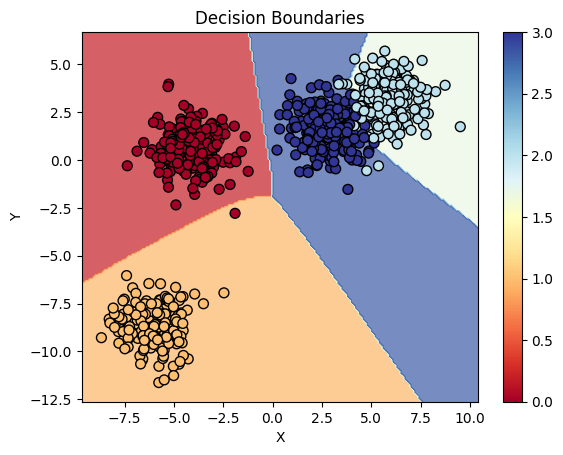

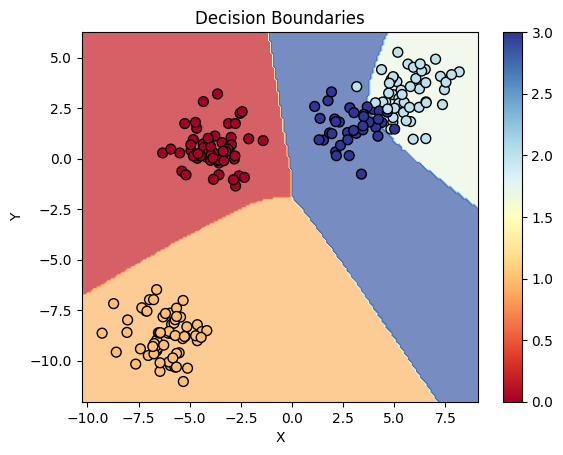

In [269]:
CLASS_COUNT = 4
SEED = 17

data, labels = make_blobs(n_samples=1000,
                               n_features=2,
                               centers=CLASS_COUNT,
                               cluster_std=1,
                               random_state=SEED)

data = torch.from_numpy(data).type(torch.float32)
labels = torch.from_numpy(labels).type(torch.LongTensor)

training_data, testing_data, training_label, testing_label = train_test_split(data, 
                                                                              labels, 
                                                                              test_size=0.2, 
                                                                              random_state=SEED)

model = Multiclass(input=training_data.shape[-1], output=CLASS_COUNT)
train_model(model, training_data, training_label, 1000, 0.01)
test_model(model, testing_data, testing_label)
plot_decision_boundaries(model, training_data, training_label)
plot_decision_boundaries(model, testing_data, testing_label)



In [276]:
t = torch.tensor([1, 1, 2])
print(len(t.shape))

1
